In [1]:
import os
import sys


from geopy.distance import geodesic
import math

import matplotlib.pyplot as plt


NOTEBOOKS_DIR: str = os.path.abspath("")
PARENT_DIR: str = os.path.dirname(NOTEBOOKS_DIR)

DATA_DIR: str = os.path.join(PARENT_DIR, "data")

sys.path.append(PARENT_DIR)

from utils.bln_reader import read_contour_file
from utils.dat_reader import multithreading_reader_data_file
from utils.preprocess import preprocess_routine

In [2]:
def area(data: list[tuple]) -> float:
    # Converter graus para radianos
    data_rad = [(math.radians(lat), math.radians(lon)) for lat, lon in data]

    # Calcular a área do polígono
    area = 0.0
    for i in range(len(data_rad)):
        # Próximo ponto (considerando o último ponto conectado ao primeiro)
        j = (i + 1) % len(data_rad)
        lat1, lon1 = data_rad[i]
        lat2, lon2 = data_rad[j]
        area += (lon2 - lon1) * (math.sin(lat1) + math.sin(lat2))

    # Área em metros quadrados
    area = abs(area * 6371000.0**2 / 2.0)

    # Conversão de metros quadrados para quilômetros quadrados
    area_km2 = area / 1000000.0

    return area_km2


def perimeter(data: list[tuple]) -> float:
    # Calcular o perímetro do polígono
    perimeter = 0.0
    for i in range(len(data)):
        # Próximo ponto (considerando o último ponto conectado ao primeiro)
        j = (i + 1) % len(data)

        # Distância entre pontos em quilômetros
        dist = geodesic(data[i], data[j]).kilometers
        perimeter += dist

    return perimeter

In [3]:
contour_df = (
    read_contour_file(
        file_path="/home/viniciusparede/repositories/personal/btg-challenge/data/PSATCMG_CAMARGOS.bln"
    ),
)[0]
forecast_df = multithreading_reader_data_file(folder_path=DATA_DIR)

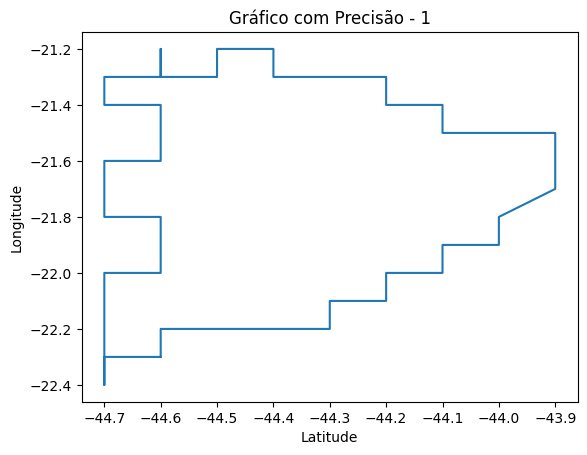

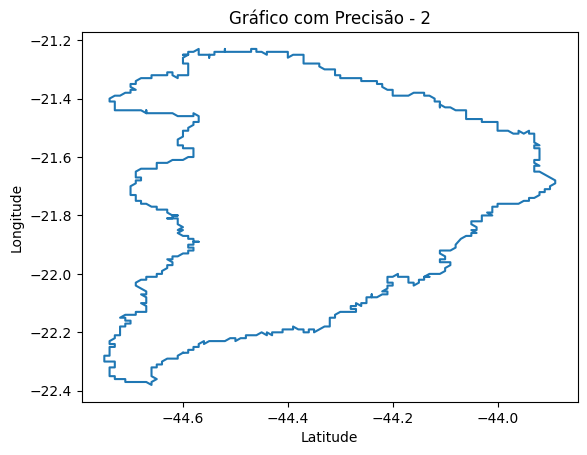

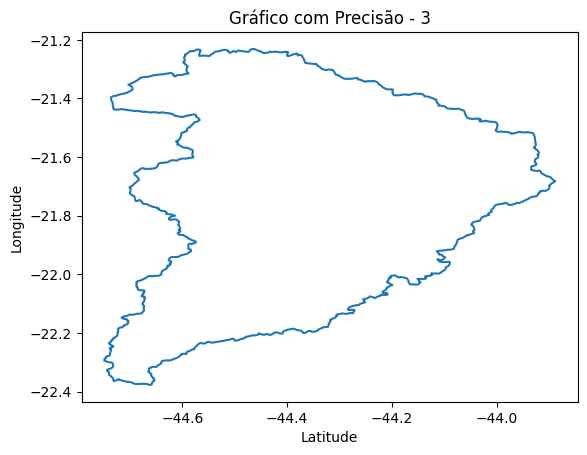

In [4]:
# Valores de precisão para iterar
precisions = [1, 2, 3]

# Iterar sobre os valores de precisão
for precision in precisions:
    # Criar um novo gráfico
    plt.figure()

    # Plotar valores arredondados de latitudes e longitudes
    plt.plot(round(contour_df["lat"], precision), round(contour_df["long"], precision))

    # Configurar título e rótulos dos eixos
    plt.title(f"Gráfico com Precisão - {precision}")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

    # Mostrar o gráfico
    plt.show()

In [5]:
df = preprocess_routine(contour_df, forecast_df)

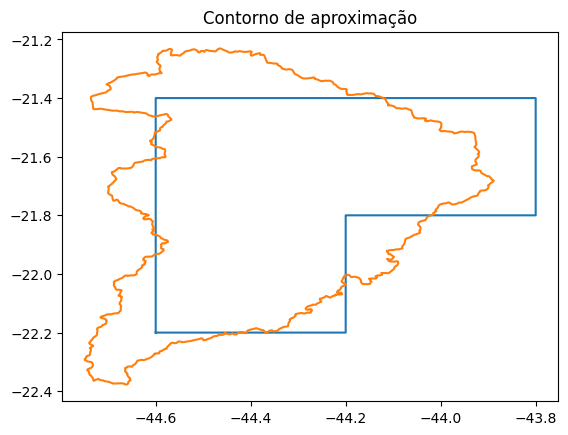

In [6]:
plt.title("Contorno de aproximação")
plt.plot(df["lat_aproximacao"], df["long_aproximacao"])
plt.plot(df["lat_referencia"], df["long_referencia"])
plt.show()

In [9]:
# Dados de (latitude, longitude)
data = [
    (-44.6, -22.2),
    (-44.6, -21.8),
    (-44.6, -21.4),
    (-44.2, -21.4),
    (-43.8, -21.4),
    (-43.8, -21.8),
    (-44.2, -21.8),
    (-44.2, -22.2),
    (-44.6, -22.2),
]


print(f"Perímetro do polígono: {perimeter(data):.2f} km")
print(f"Área do polígono: {area(data):.2f} km²")

Perímetro do polígono: 305.47 km
Área do polígono: 4249.92 km²
